Loading data...
Scaling data...
Determining optimal k using the Elbow Method...


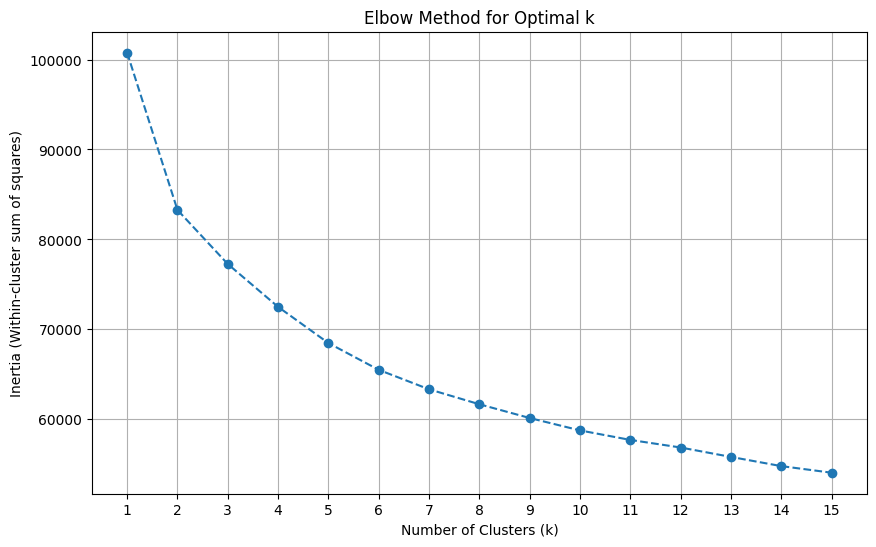

Elbow method plot saved to elbow_method_plot.png
Performing K-means clustering with k=4...
Reducing dimensionality with PCA for visualization...
Generating final cluster visualization...


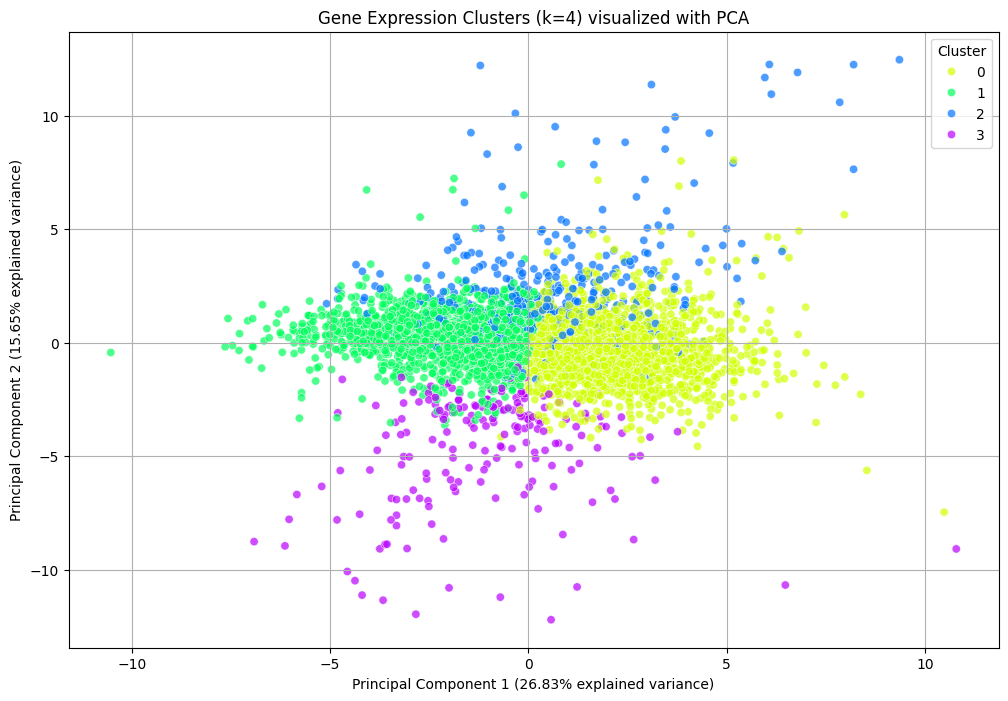

Cluster visualization saved to gene_clusters_pca.png

--- Analysis Complete ---
Found 4 clusters.
Number of genes in each cluster:
cluster
0    1789
1    1904
2     489
3     199
Name: count, dtype: int64


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_gene_expression_data(file_path):
    """
    Performs a complete clustering analysis on gene expression data.
    
    This function loads the data, preprocesses it, determines the optimal
    number of clusters using the Elbow Method, performs K-means clustering,
    and visualizes the results using PCA.

    Args:
        file_path (str): The path to the CSV file containing the gene data.
    """
    try:
        # --- 1. Load and Prepare the Data ---
        # Load the dataset, using the first column (gene names) as the index.
        print("Loading data...")
        df = pd.read_csv(file_path, index_col=0)
        
        # The data represents time-series expression levels.
        # We'll drop any rows with missing values for this analysis.
        df.dropna(inplace=True)
        
        # It's crucial to scale the data for distance-based algorithms like K-means.
        # Each gene's expression profile (row) is scaled to have a mean of 0 and variance of 1.
        print("Scaling data...")
        scaler = StandardScaler()
        # We transpose the data so that scaler treats each gene's time series as a feature set.
        scaled_data = scaler.fit_transform(df.values)

        # --- 2. Determine Optimal Number of Clusters (Elbow Method) ---
        print("Determining optimal k using the Elbow Method...")
        inertia = []
        k_range = range(1, 16) # Test k from 1 to 15
        
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(scaled_data)
            inertia.append(kmeans.inertia_)
            
        # Plotting the Elbow Method results
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertia, marker='o', linestyle='--')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia (Within-cluster sum of squares)')
        plt.title('Elbow Method for Optimal k')
        plt.xticks(k_range)
        plt.grid(True)
        # Save the plot to a file
        elbow_plot_path = 'elbow_method_plot.png'
        plt.savefig(elbow_plot_path)
        plt.show()
        print(f"Elbow method plot saved to {elbow_plot_path}")


        # --- 3. Perform K-means Clustering ---
        # Based on the elbow plot, we select an optimal 'k'. 
        # Let's assume the elbow is at k=4 for this example.
        # You should inspect the plot and choose the 'k' where the drop in inertia slows down.
        optimal_k = 4 
        print(f"Performing K-means clustering with k={optimal_k}...")
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(scaled_data)
        
        # Add the cluster assignments to the original dataframe
        df['cluster'] = clusters

        # --- 4. Visualize Clusters with PCA ---
        # Reduce the high-dimensional data to 2 dimensions for plotting.
        print("Reducing dimensionality with PCA for visualization...")
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)
        
        # Create a new DataFrame for the PCA results
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['cluster'] = clusters
        pca_df['gene'] = df.index
        
        # Create the scatter plot
        print("Generating final cluster visualization...")
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette=sns.color_palette("hsv", optimal_k), alpha=0.7)
        
        plt.title(f'Gene Expression Clusters (k={optimal_k}) visualized with PCA')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)')
        plt.legend(title='Cluster')
        plt.grid(True)

        # Save the final plot
        cluster_plot_path = 'gene_clusters_pca.png'
        plt.savefig(cluster_plot_path)
        plt.show()
        print(f"Cluster visualization saved to {cluster_plot_path}")
        
        # --- 5. Display Cluster Information ---
        print("\n--- Analysis Complete ---")
        print(f"Found {optimal_k} clusters.")
        print("Number of genes in each cluster:")
        print(df['cluster'].value_counts().sort_index())


    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Main Execution ---
if __name__ == '__main__':
    # The user uploaded 'Spellman.csv'. We will use this file.
    # Make sure 'Spellman.csv' is in the same directory as this script.
    file_name = 'Spellman.csv'
    analyze_gene_expression_data(file_name)
    file_path = 'Spellman.csv'

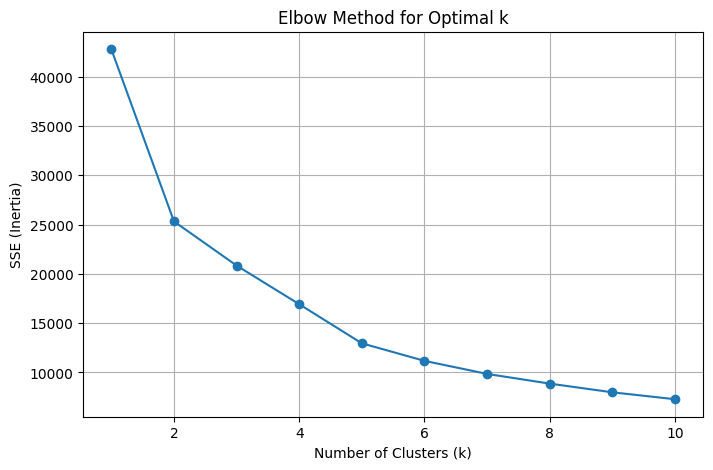

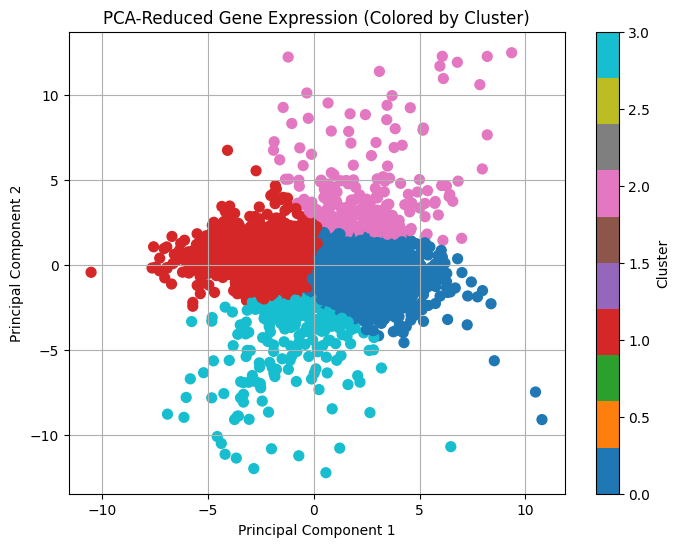

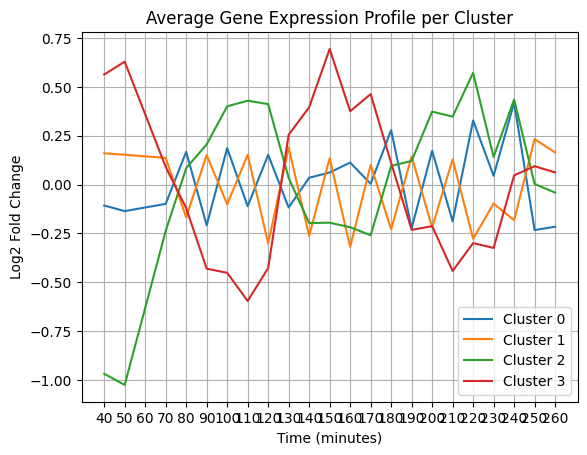

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the dataset
df = pd.read_csv("Spellman.csv", index_col=0)

# Step 2: Preprocess (standard scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply PCA (retain 95% variance or reduce to 2D for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 4: Elbow method to determine optimal k
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 5: Choose optimal k from elbow method (e.g., 3 or 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Step 6: Add cluster labels back to original dataframe
df['Cluster'] = clusters

# Step 7: Visualize clusters using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='tab10', s=50)
plt.title('PCA-Reduced Gene Expression (Colored by Cluster)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Step 8: Plot average expression per cluster
time_points = df.columns[:-1]  # all time columns
for i in range(optimal_k):
    cluster_profile = df[df['Cluster'] == i].iloc[:, :-1].mean(axis=0)
    plt.plot(time_points, cluster_profile, label=f'Cluster {i}')
    
plt.title('Average Gene Expression Profile per Cluster')
plt.xlabel('Time (minutes)')
plt.ylabel('Log2 Fold Change')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Save the clustered results
df.to_csv("clustered_spellman_data.csv")
